0.23809523809523808


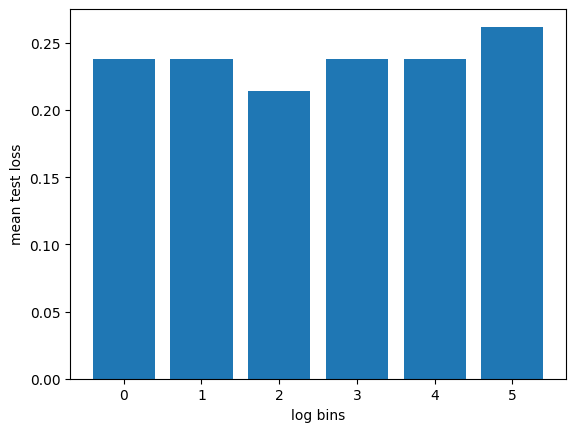

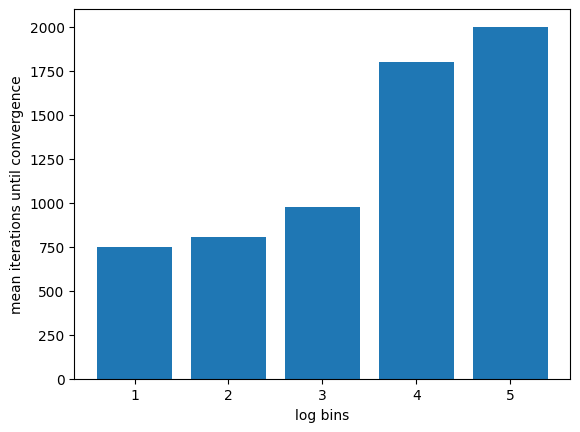

[554]


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from experiment import experiment
from experiment import test_loss
import random
scaler = MinMaxScaler(feature_range=(-1, 1))
"""
#loading and sorting the data
diabetes_data = pd.read_csv("diabetes.csv").to_numpy()
diabetes_x = diabetes_data[:,:-1]
diabetes_y = diabetes_data[:,-1]
diabetes_y = np.where(diabetes_y == 0,-1, diabetes_y)
# avoid overflow error

diabetes_x = scaler.fit_transform(diabetes_x)
bias = np.ones((diabetes_x.shape[0],1))
diabetes_x = np.hstack((bias,diabetes_x))
"""
#loading sonar data
sonar_data = pd.read_csv("sonar.csv").to_numpy()
sonar_x = sonar_data[:,:-1]
sonar_x = scaler.fit_transform(sonar_x)
#add intercept
bias = np.ones((sonar_data.shape[0],1))
sonar_x = np.hstack((bias, sonar_x)).astype(float)
sonar_y = sonar_data[:,-1]
#convert labels to +1 -1
sonar_y = np.where(sonar_y == "M",1,-1)

bins = [1,2,3,4,5]

normal_iters, quant_iters,  w_quant, w = experiment(sonar_x,sonar_y, bins)
print(normal_iters)

In [2]:
from QuantLog import quantlogistic
from NormalLog import normallogistic

#generate random w to test gradient func on
w_test = np.random.rand(sonar_x.shape[1]) *2 -1

loss, ng = normallogistic(w_test,sonar_x.T,sonar_y.T)
loss, qg1 = quantlogistic(w_test,sonar_x.T,sonar_y.T,1)
loss, qg2 = quantlogistic(w_test,sonar_x.T,sonar_y.T,2)
loss, qg3 = quantlogistic(w_test,sonar_x.T,sonar_y.T,3)
loss, qg4 = quantlogistic(w_test,sonar_x.T,sonar_y.T,4)
loss, qg5 = quantlogistic(w_test,sonar_x.T,sonar_y.T,5)


gradients = np.hstack((ng,qg1,qg2,qg3,qg4,qg5))
print(gradients)

# the left col is the actual gradient, the 3 to the right are the gradients for 2,4,and 8 quantization levels 
# according to the scheme in QuantLog.py

[[-0.39301282 -0.42028986 -0.34005895 -0.3762724  -0.39140616 -0.39241691]
 [ 0.19971347  0.21973551  0.16363053  0.18922815  0.19670736  0.19847579]
 [ 0.24487508  0.2661726   0.20384507  0.23304824  0.24268247  0.24375427]
 [ 0.25958649  0.27824119  0.21793671  0.24718211  0.2578841   0.2588235 ]
 [ 0.27541378  0.29727948  0.23122208  0.26191215  0.27343896  0.27448486]
 [ 0.22399279  0.24557309  0.18520867  0.2109526   0.22228818  0.22298169]
 [ 0.17770194  0.19277842  0.14810206  0.16795899  0.17710667  0.17716718]
 [ 0.13698214  0.14977414  0.11180298  0.12905611  0.13542511  0.13619132]
 [ 0.15724685  0.18058259  0.1307455   0.14910828  0.15576803  0.15624666]
 [ 0.16007452  0.18574747  0.13159193  0.149726    0.15723555  0.15853171]
 [ 0.12276825  0.14668706  0.09842315  0.11396889  0.1202383   0.12123759]
 [ 0.07820238  0.09662041  0.05771493  0.07038427  0.0763446   0.07714232]
 [ 0.04040076  0.05083507  0.02301074  0.03277895  0.0394689   0.03979639]
 [ 0.03346097  0.04440175